# CHALLENGE 1: SimpleRNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

In [14]:
# Reuseable visualizatoin function
def visualize_plot(x, y=None, x_label='', y_label='', title='', labels=None, markers=None, legend=True, grid=True, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    if y is not None:
        if isinstance(x, list) and isinstance(y, list) and len(x) == len(y):  # Multiple series
            for i in range(len(y)):
                plt.plot(x[i], y[i], label=labels[i] if labels else None, marker=markers[i] if markers else None)
        else:  # Single series
            plt.plot(x, y, label=labels[0] if labels else None, marker=markers[0] if markers else None)
    else:  # Plot only x if y is None
        plt.plot(x)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if legend and labels:
        plt.legend()
    if grid:
        plt.grid(True)
    plt.show()


# Helper function to prepare windowed datasets
def windowed_dataset(series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1])) # Split into input (x) and target (y)
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(1) # Shuffle, batch, and prefetch
    return dataset


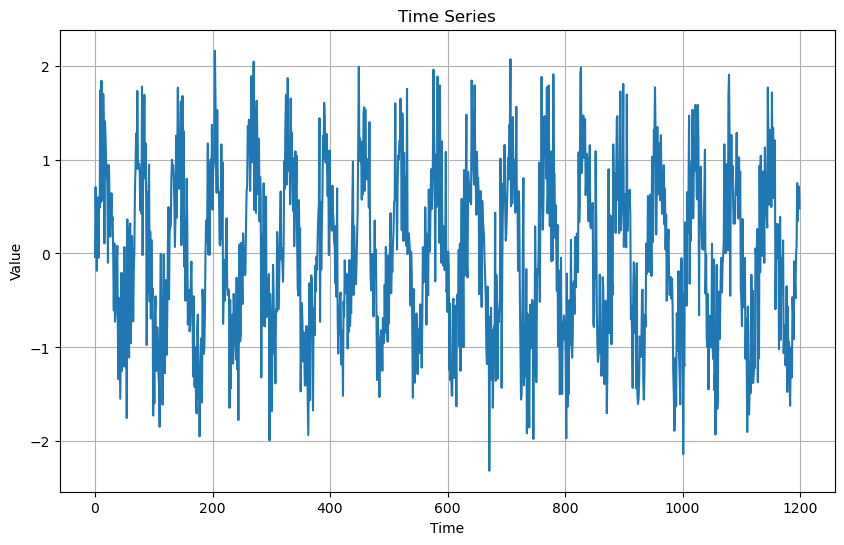

In [9]:
# Create synthetic time series data
def generate_time_series():
    time = np.arange(1200)
    series = np.sin(0.1 * time) + np.random.normal(scale=0.5, size=1200)
    return time, series
    
time, series = generate_time_series()

# Plot the synthetic data
visualize_plot(
    time, series,
    x_label='Time', y_label='Value',
    title = 'Time Series',
    grid=True
)

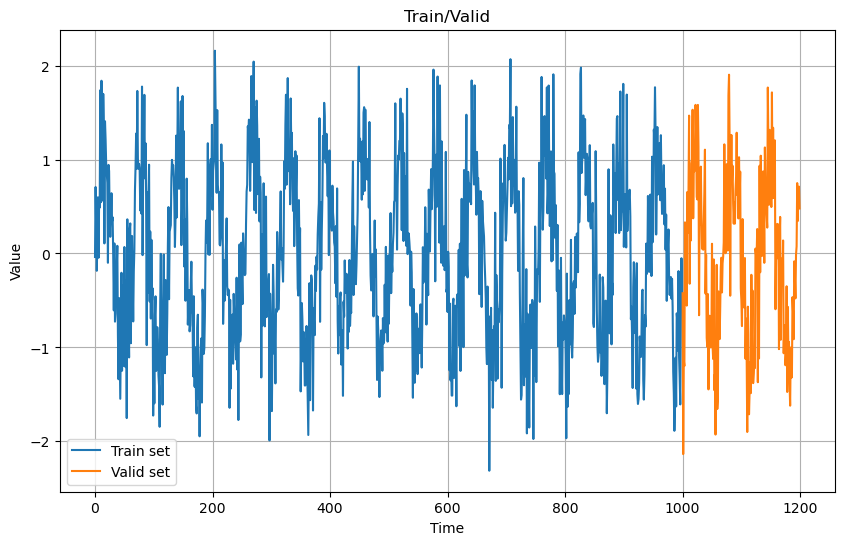

In [10]:
# Split the data into training and validation sets
split_time = 1000
x_train = series[:split_time]
x_valid = series[split_time:]

# Visualize the split
visualize_plot(
    [time[:split_time], time[split_time:]],
    [x_train, x_valid],
    x_label='Time', y_label='Value',
    title='Train/Valid',
    labels=['Train set', 'Valid set']
)

In [16]:
# Window size and batch size
window_size = 20
batch_size = 32

# Create windowed datasets for both training and validation
train_dataset = windowed_dataset(x_train, window_size, batch_size)
valid_dataset = windowed_dataset(x_valid, window_size, batch_size)

# Build the RNN model using Functional API
inputs = layers.Input(shape=[window_size, 1], name="Input_Layer")
x = layers.SimpleRNN(20, activation='relu', name='RNN_Layer')(inputs)
outputs = layers.Dense(1, name='Ouput_Layer')(x)

# Create the model
rnn_model = Model(inputs=inputs, outputs=outputs, name='RNN_Model')

# Compile the model
rnn_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=['mse'])
rnn_model.summary()

# Train the model
history = rnn_model.fit(
    train_dataset.repeat(),
    epochs=100,
    validation_data=valid_dataset.repeat(),
    steps_per_epoch=len(x_train) // batch_size,
    validation_steps=len(x_valid) // batch_size
)

Model: "RNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ RNN_Layer (SimpleRNN)           │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Ouput_Layer (Dense)             │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5177 - mse: 0.5177 - val_loss: 0.3894 - val_mse: 0.3894
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3386 - mse: 0.3386 - val_loss: 0.3703 - val_mse: 0.3703
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3226 - mse: 0.3226 - val_loss: 0.3696 - val_mse: 0.3696
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3272 - mse: 0.3272 - val_loss: 0.3610 - val_mse: 0.3610
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3387 - mse: 0.3387 - val_loss: 0.3582 - val_mse: 0.3582
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3450 - mse: 0.3450 - val_loss: 0.3605 - val_mse: 0.3605
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3151 - mse: 0.3151 - val_loss: 0.3556 - val_mse: 0.3556
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3218 - mse: 0.3218 - val_loss: 0.3555 - val_mse: 0.3555
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.322

Epoch 55/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2712 - mse: 0.2712 - val_loss: 0.3267 - val_mse: 0.3267
Epoch 56/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2863 - mse: 0.2863 - val_loss: 0.3320 - val_mse: 0.3320
Epoch 57/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2939 - mse: 0.2939 - val_loss: 0.3289 - val_mse: 0.3289
Epoch 58/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2747 - mse: 0.2747 - val_loss: 0.3239 - val_mse: 0.3239
Epoch 59/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2692 - mse: 0.2692 - val_loss: 0.3313 - val_mse: 0.3313
Epoch 60/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2607 - mse: 0.2607 - val_loss: 0.3284 - val_mse: 0.3284
Epoch 61/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2586 - mse: 0.2586 - val_loss: 0.3295 - val_mse: 0.3295
Epoch 62/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2649 - mse: 0.2649 - val_loss: 0.3384 - val_mse: 0.3384
Epoch 63/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


2024-11-29 09:36:34.704487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


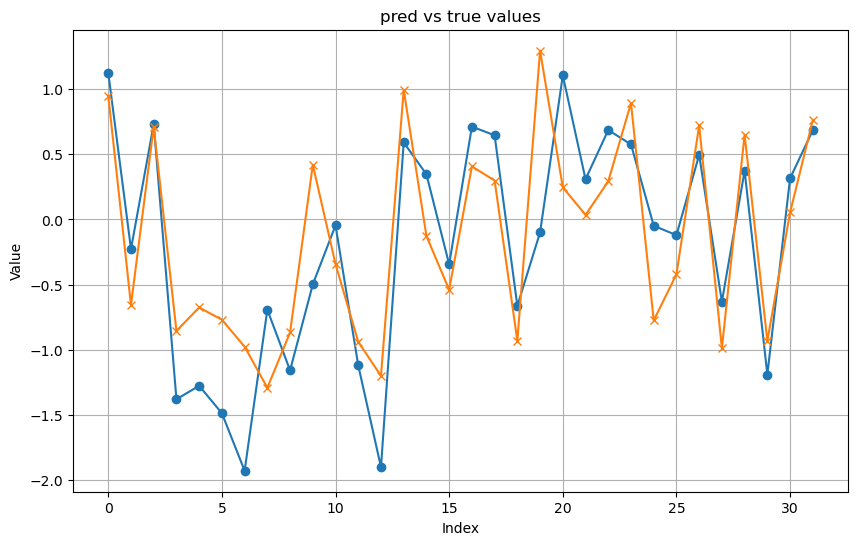

In [18]:
# Make predictions
for input_batch, target_batch in valid_dataset.take(1):
    predictions = rnn_model.predict(input_batch).flatten()
    true_values = target_batch.numpy().flatten()

# Visualize predictions vs. true values
visualize_plot(
    [range(len(true_values)), range(len(predictions))],
    [true_values, predictions],
    x_label='Index', y_label='Value',
    title='pred vs true values',
    markers=['o','x']
)